In [13]:
import os
from util.experiment_setup import load_log
from matplotlib import pyplot as plt
import numpy as np

In [14]:
train1 = "../models/bg_transform/retinal_base_no_scale"
train2 = "../models/bg_transform/retinal_base_no_scale"
log1 = load_log(os.path.join(os.path.split(train1)[0],"logs",os.path.split(train1)[1]+".yaml"))
log2 = load_log(os.path.join(os.path.split(train2)[0],"logs",os.path.split(train2)[1]+".yaml"))

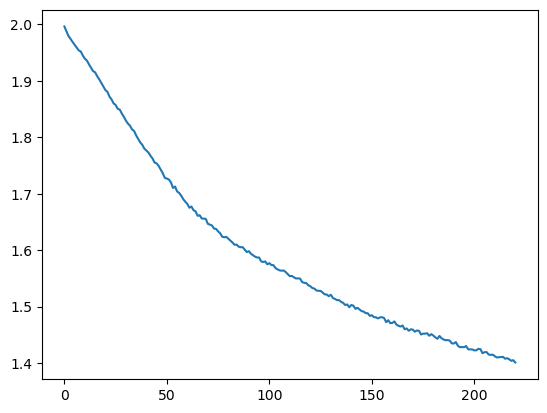

In [15]:
plt.plot(log1["train_loss"])
plt.plot(log2["train_loss"])
plt.show()

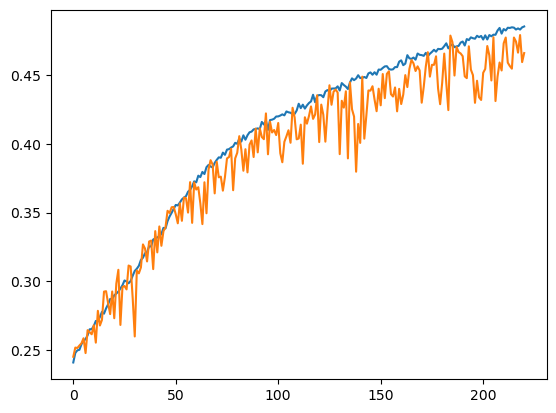

In [16]:
plt.plot(log["train_acc"])
plt.plot(np.array(log["val_acc"])/100)
plt.show()